In [23]:
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from dotenv import load_dotenv

In [24]:
load_dotenv(override=True)

True

In [ ]:
class WeatherState(TypedDict):
    question: str 
    answer: str


In [26]:
llm = ChatOpenAI(
    model="gpt-4o-mini"
)

In [27]:
def question_qa(state: WeatherState):
    prompt= f" Answer : {state['question']}"
    state['answer']=llm.invoke(prompt).content
    return state
   

In [28]:
graph= StateGraph(WeatherState)

graph.add_node("question_qa",question_qa)

graph.add_edge(START,"question_qa")

graph.add_edge("question_qa", END)

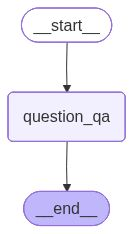

In [36]:
graph.compile()

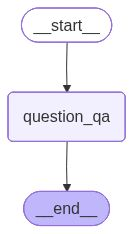

In [38]:
display(Image(workflow.get_graph().draw_mermaid_png()))

In [33]:
response = workflow.invoke({"question": "What is the weather like today in Pune?"})

In [34]:
print(response)

{'question': 'What is the weather like today in Pune?', 'answer': "I'm sorry, but I can't provide real-time weather updates. I recommend checking a reliable weather website or app for the most current weather information in Pune."}
